===================================================  
Sneakers Resale Price Analysis

by Angger Rizky Firdaus

This project is developed to accomplish milestone 1 of the FTDS Hacktiv8 program.

===================================================


In [1]:
#Import Library
import opendatasets as od
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import numpy as np
np.random.seed(10)

C:\Users\D5att\AppData\Local\Temp\ipykernel_20064\1369496293.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Identification of problems

__Case__

I am a sneaker seller offering a wide range of sneakers that are currently popular within the sneaker enthusiast community. I intend to purchase a considerable amount of sneakers to stock up for resale. However, I'm uncertain about which brands and models to invest in. Currently, two shoes that are highly discussed are the Adidas X Yeezy: Adidas Yeezy and the Nike x Off-White collaboration. I aim to determine which of these two collaborations garners more interest and sells more quickly based on an analysis of the StockX Sneaker Data Contest dataset from Kaggle.


Source of dataset : https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest/data  

__SMART Framework__

To establish the purpose, process, and deadline, I have devised the SMART Framework:

- Specific: To procure highly sought-after sneakers to expedite product turnover.

- Measurable: Achieve a 20% profit margin on each sale.

- Achievable: Analyze dataset to identify popular sneaker models and sizes, determine appropriate pricing strategies to attain desired profit margins.

- Relevant: Shoe type and size directly impact pricing.

- Time-Bound: Results will be assessed by the end of Quarter 2 (within the next 3 months).

Summary

Conduct analysis on sneaker sales data to identify profitable shoe models and sizes with a 20% profit margin target. Results will be evaluated in the following quarter.

__Breaking Down The Problem__

The issues to be addressed are:

1. Is there a correlation between sizing and pricing?
2. What is the appropriate price point for selling the shoes?
3. Which sizes are in high demand among buyers?
4. Which shoe models and brands are most favored?
5. When is the optimal time to sell the shoes?
6. Which regions demonstrate the highest purchasing activity for sneakers?
7. Is the average price of Adidas Yeezy shoes comparable to the average price of Nike x Off-White shoes?




# Data Loading

In [2]:
#The syntax to download a file from Kaggle using the libraries from OpenDatasets.
#od.download('https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest/data')

In [3]:
#Loading dataset from csv file
df = pd.read_csv('StockX-Data-Contest-2019-3.csv')


In [4]:
#assign new variable to call the dataset
sniker = df.copy()
sniker

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


In [5]:
#the summary about dataset
sniker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


__Insight Dataset__

Based on the provided explanation by the dataset owner, this dataset comprises sales data for Nike x Offwhite and Adidas Yeezy 350 shoes from September 1, 2017, to February 13, 2019, sourced from the Stock X sneaker resale platform. It includes a total of 99,956 rows and 8 columns. The data is derived solely from sales in the United States.

Columns in the Dataset:
- Order Date: Date of the sneaker purchase.
- Brand: Brand of the sneakers (Off-White and Yeezy).
- Sneaker Name: Name of the purchased sneaker.
- Sale Price: Price at which consumers purchased the sneakers, reflecting the prevailing market price (resale price).
- Retail Price: Retail price of the sneakers when sold by the store/brand.
- Release Date: Release date of each shoe.
- Shoe Size: Size of the sneakers purchased by consumers.
- Buyer Region: Information regarding the city of the consumer who purchased the sneakers.


# Data Cleaning

During the data cleaning process, values ​​are sanitized from unwanted characters such as inappropriate spaces and currency symbols, and the column data types are replaced. Additionally, a check is performed to identify any null data.

In [6]:
#The syntax to view unique values in the data.
sniker['Brand'].unique()

array([' Yeezy', 'Off-White'], dtype=object)

There is a space in the data "Yeezy", hence cleaning is conducted to remove the space.

In [7]:
#The syntax to remove leading and trailing spaces from a value.
sniker['Brand'] = sniker['Brand'].str.strip()

In [8]:
#checking if the process above is working
sniker['Brand'].unique()

array(['Yeezy', 'Off-White'], dtype=object)

It can be observed that the space within the data "Yeezy" is no longer present.

In [9]:
#checking if there's a missing value in the dataset.
sniker.isnull().any()

Order Date      False
Brand           False
Sneaker Name    False
Sale Price      False
Retail Price    False
Release Date    False
Shoe Size       False
Buyer Region    False
dtype: bool

from the result, there's no missing value 

In [10]:
#showing the summary of the data
sniker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


Based on the data, it can be observed that there are no null values, with a total of 99,956 entries. Additionally, there are columns that do not match their appropriate data types, such as the sale price, retail price, order date, and release date columns. These columns need to be converted to their appropriate data types.

In [11]:
#The syntax to remove unnecessary symbols from the data.
sniker['Retail Price'] = sniker['Retail Price'].str.replace('$',"")
sniker['Sale Price'] = sniker['Sale Price'].str.replace('$',"")


sniker['Sale Price'] = sniker['Sale Price'].str.replace(',',"")
sniker['Retail Price'] = sniker['Retail Price'].str.replace('\,',"")


In [12]:
#change datatype into integer for Sale Price and Retail Price
sniker['Sale Price'] =  sniker['Sale Price'].astype('int64')
sniker['Retail Price'] = sniker['Retail Price'].astype('int64')

In [13]:
#change datatype into datetime for order date and release date

sniker['Order Date'] = sniker['Order Date'].astype('datetime64[ns]')
sniker['Release Date'] = sniker['Release Date'].astype('datetime64[ns]')

C:\Users\D5att\AppData\Local\Temp\ipykernel_20064\783673310.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sniker['Order Date'] = sniker['Order Date'].astype('datetime64[ns]')
C:\Users\D5att\AppData\Local\Temp\ipykernel_20064\783673310.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sniker['Release Date'] = sniker['Release Date'].astype('datetime64[ns]')


In [14]:
#check if the dataset is good for analysis
sniker

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565,220,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598,220,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605,220,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650,220,2018-12-26,11.0,California


Dapat dilihat bahwa data sudah bersih seperti tidak ada symbol pada kolom sale price dan retail price. Sehingga data siap untuk di analisis.

In [15]:
#saving the clean dataset
sniker.to_csv('m1_clean.csv', index=False)

# Exploratory Data Analysis

The analysis process is divided into two parts: Descriptive Statistical Analysis and Inferential Statistical Analysis. The analysis is conducted to address the problem statement, the results of which serve as the framework for the SMART framework.

## Descriptive Analysis

1. Which shoe models and brands are most favored in terms of popularity?

In [16]:
#Calculating the number of shoes sold for each brand.
sniker['Brand'].value_counts()

Brand
Yeezy        72162
Off-White    27794
Name: count, dtype: int64

It can be observed that Adidas Yeezy shoes are more popular than Nike x Off-White, as Adidas Yeezy sold 72,162 pairs, while Nike x Off-White sold 27,794 pairs.

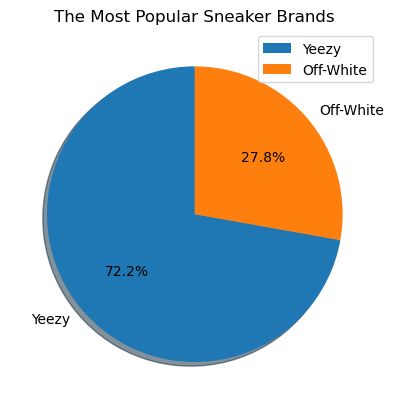

In [17]:
#The syntax to display a pie chart representing the total sales data between 2 brands.
plt.pie(sniker['Brand'].value_counts(), labels = sniker['Brand'].unique(),autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend()
plt.title("The Most Popular Sneaker Brands")

plt.show() 


From the following pie chart, it can be observed that Yeezy sneaker sales surpass Nike x Off-White sneaker sales. Adidas x Yeezy sales account for 72.2% of all recorded transactions.

In [18]:
#To calculate the total sales quantity for each type of shoe.
sniker['Sneaker Name'].value_counts()

Sneaker Name
adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Nike-Air-Presto-Off-White-Black-2018                  1884
Nike-Air-Presto-Off-White-White-2018                  1883
Nike-Air-VaporMax-Off-White-2018                      1591
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                 1398
Nike-Zoom-Fly-Off-White-Pink                          1359
Nike-Air-VaporMax-Off-White-Black          

It can be observed that the most purchased shoe is the Adidas Yeezy Boost 350 V2 Butter, with a total of 11,423 pairs sold.

Text(0.5, 0, 'Jumlah Terjual')

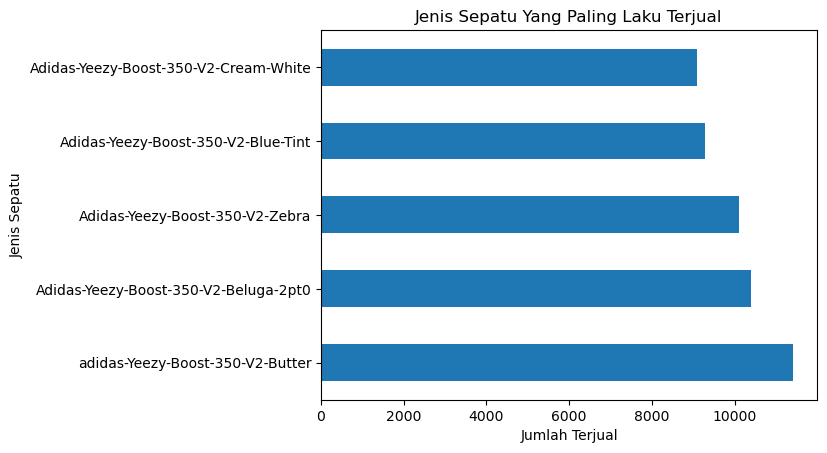

In [19]:
#syntax for showing horizontal barplot for showing the most popular shoes
sniker['Sneaker Name'].value_counts().head(5).plot(kind="barh")
plt.title("Jenis Sepatu Yang Paling Laku Terjual")
plt.ylabel("Jenis Sepatu")
plt.xlabel("Jumlah Terjual")

From the data provided, the best-selling shoe is the Adidas Yeezy Boost 350 V2 Butter, with a total of 11,423 units sold. The bar chart displayed indicates that the top 1 to 5 rankings are dominated by Yeezy shoes.

2. When is the optimal time to sell shoes?

In [20]:
# The syntax to calculate the total sales for each month.
sniker['Order Date'].dt.month.value_counts().sort_index()

Order Date
1     14511
2      7774
3      2745
4      2756
5      3456
6      5431
7      7434
8      6090
9      4671
10     7307
11    15489
12    22292
Name: count, dtype: int64

Based on this data, the months with the highest number of purchase transactions are December, November, and January.

Text(0, 0.5, 'Quantity Sold')

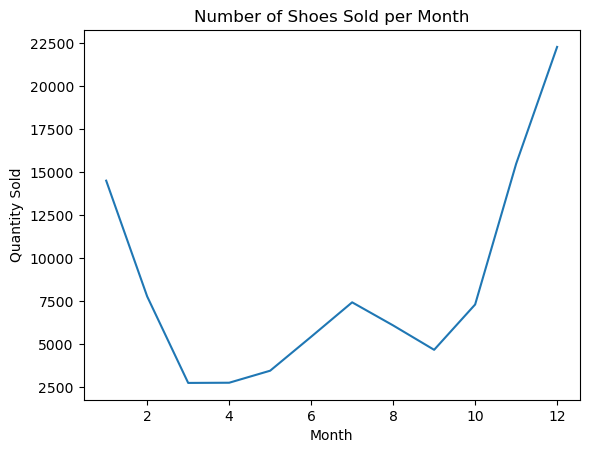

In [21]:
# Syntax to display a line chart for the number of shoes sold per month
sniker['Order Date'].dt.month.value_counts().sort_index().plot(kind="line")
plt.title("Number of Shoes Sold per Month")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")


From the data, it can be observed that the highest number of shoe sales occurred in December, with a total of 22,292 pairs sold, followed by November with 15,489 pairs and January with 14,511 pairs. It can be concluded that people tend to shop more for shoes towards the end and beginning of the year. This trend is likely influenced by various factors such as year-end discounts and festivities like Christmas and New Year's, where people tend to spend more money on shopping. Additionally, from the data, it can be seen that sales decrease in February compared to January and further decline in March. There is an increase in sales in July but a decrease again in August. Sales increase from November to December.

3. Daerah mana yang paling banyak membeli sepatu? 

In [22]:
#Calculating the total sales from each city.
sniker['Buyer Region'].value_counts()

Buyer Region
California              19349
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Illinois                 3782
Pennsylvania             3109
Massachusetts            2903
Michigan                 2762
Virginia                 2058
Ohio                     1890
Maryland                 1870
Washington               1863
Georgia                  1846
Arizona                  1398
North Carolina           1344
Delaware                 1242
Connecticut              1110
Indiana                  1026
Colorado                  954
Wisconsin                 840
Nevada                    790
Tennessee                 731
Minnesota                 725
Missouri                  660
South Carolina            570
Louisiana                 537
Kentucky                  488
Iowa                      460
Alabama                   457
Utah                      450
Oklahoma                  4

Based on the data provided, consumers predominantly originate from California with a total of 19,349 transactions, followed by New York with 16,525 transactions, and Oregon with 7,681 transactions.

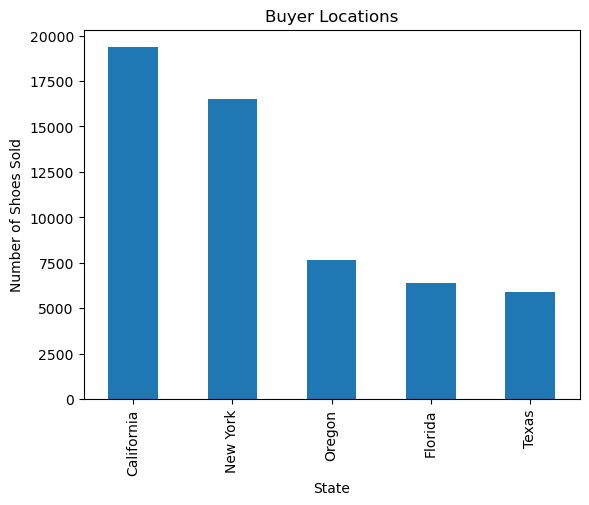

In [23]:
# Syntax to display a bar chart of buyer locations
sniker['Buyer Region'].value_counts().head(5).plot(kind="bar")
plt.title("Buyer Locations")
plt.xlabel("State")
plt.ylabel("Number of Shoes Sold")
plt.show()

From this data, it's evident that purchases predominantly originate from cities like California and New York. These cities are known for their strong economies in the United States, reflecting the high purchasing power of residents. This trend may be attributed to factors such as higher disposable incomes, greater fashion consciousness, and the presence of affluent neighborhoods within these cities, all of which contribute to increased spending on luxury items like sneakers.

### Central tedency sale price, shoe size

In [24]:
# Calculating the mean, median, standard deviation, skewness, and kurtosis of the Sale Price column.

average_resale_price = sniker['Sale Price'].mean()
median_resale_price = sniker['Sale Price'].median(axis=0)
std_dev_resale_price = sniker['Sale Price'].std()
skewness_resale_price = sniker['Sale Price'].skew()
kurtosis_resale_price = sniker['Sale Price'].kurt()

print(f'The average resale price of shoes is {average_resale_price}')
print(f'The median resale price of shoes is {median_resale_price}')
print(f'The standard deviation of resale price of shoes is {std_dev_resale_price}')
print(f'The skewness of resale price of shoes is {skewness_resale_price}')
print(f'The kurtosis of resale price of shoes is {kurtosis_resale_price}')


The average resale price of shoes is 446.63471927648163
The median resale price of shoes is 370.0
The standard deviation of resale price of shoes is 255.9829688569934
The skewness of resale price of shoes is 3.030301762261918
The kurtosis of resale price of shoes is 15.673064458555249


Based on the Sale Price column data, the mean is 446.63471927648163, the median is 370.0, the standard deviation is 255.9829688569934, the skewness is 3.030301762261918, and the kurtosis is 15.673064458555249. With the mean larger than the median, the data distribution is skewed to the left or positively skewed. The skewness value above 1 indicates a highly skewed distribution. The kurtosis value above 1 also suggests that the distribution is leptokurtic. With the standard deviation below the mean, it can be concluded that the data has low variability.

Based on this explanation, most shoes are priced around the median of $370. However, the mean is influenced by outliers, which are shoes with very high prices. Nonetheless, the data has low variability due to the low standard deviation. Looking at the median and mean, these shoes are likely Adidas x Yeezy, which dominate sales in this dataset.

<Axes: >

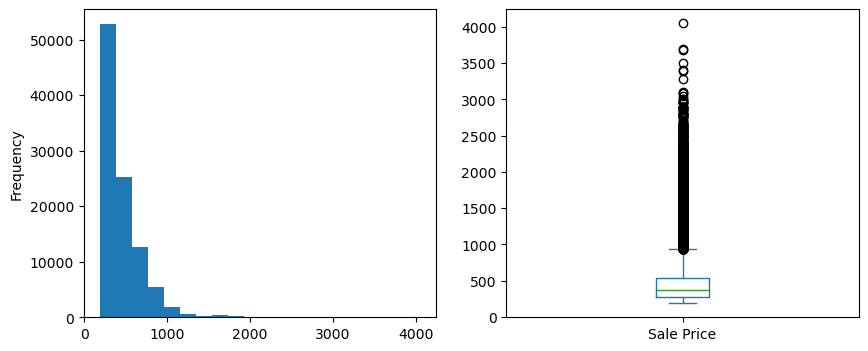

In [25]:
# Syntax to display a Bar chart and Boxplot of the Sale Price column

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

sniker['Sale Price'].plot(kind='hist',bins=20,ax=ax[0])
sniker['Sale Price'].plot(kind='box',ax=ax[1])

The explanation above is supported by the bar chart illustrating a left-skewed data distribution with the presence of outliers. The boxplot chart depicts the presence of numerous outliers.

In [26]:
# Calculating the mean, median, standard deviation, skewness, and kurtosis of the Shoe Size column.

average_shoe_size = sniker['Shoe Size'].mean()
median_shoe_size = sniker['Shoe Size'].median(axis=0)
std_dev_shoe_size = sniker['Shoe Size'].std()
skewness_shoe_size = sniker['Shoe Size'].skew()
kurtosis_shoe_size = sniker['Shoe Size'].kurt()

print(f'The average shoe size sold is {average_shoe_size}')
print(f'The median shoe size sold is {median_shoe_size}')
print(f'The standard deviation of shoe size sold is {std_dev_shoe_size}')
print(f'The skewness of shoe size sold is {skewness_shoe_size}')
print(f'The kurtosis of shoe size sold is {kurtosis_shoe_size}')

The average shoe size sold is 9.344181439833527
The median shoe size sold is 9.5
The standard deviation of shoe size sold is 2.3295876028888465
The skewness of shoe size sold is -0.3806057726037941
The kurtosis of shoe size sold is -0.31964085126902786


Based on the data from the Shoe Size column, the average shoe size sold is 9.344181439833527, the median is 9.5, the standard deviation is 2.3295876028888465, the skewness is -0.3806057726037941, and the kurtosis is -0.31964085126902786. With a skewness value below -0.5, the distribution for this data is symmetric. The close proximity of the mean and median suggests that the data is fairly symmetrical. The standard deviation below the mean and approaching 0 indicates low variability and the data points are not far from the mean.

Based on this explanation, the mean and median values are not significantly different, both around 9.5.

<Axes: >

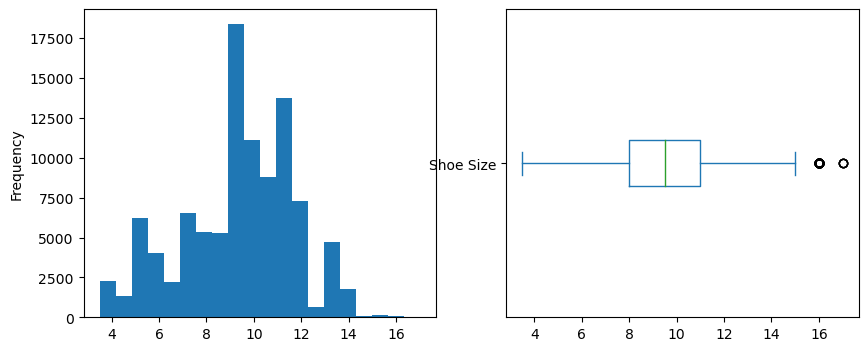

In [27]:
# Syntax to display a bar chart and boxplot of the Shoe Size column
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
sniker['Shoe Size'].plot(kind='hist',bins=20,ax=ax[0])
sniker['Shoe Size'].plot(kind='box',ax=ax[1],vert=False)

As explained above, the data distribution tends to be normal, but when observing the boxplot, there are outlier values. However, these values do not significantly impact the overall data values.

### Correlation Test

"I want to determine if the price is influenced by the size of the shoes sold. Can I sell one type of shoe at the same price or different prices? A correlation test is needed."

"Is there a correlation between shoe size and the resale price of sneakers?"

h0: There is no correlation between the resale price of sneakers and the size of sneakers.  
h1: There is a correlation between the resale price of sneakers and the size of sneakers.

In [28]:
# Correlation test using the Spearman method
corr_rho, pval_s = stats.spearmanr(sniker['Sale Price'], sniker['Shoe Size'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

# The selection of the Spearman method is due to the data not being normally distributed, and this method is not sensitive to outliers.

rho-correlation: 0.08, p-value: 1.702653682050742e-147


Based on the correlation result of 0.08 and the p-value of p-value: 1.702653682050742e-147, since the p-value is below 0.05, we accept h1, indicating a correlation between the resale price of shoes and the size of shoes. Furthermore, the positive correlation value indicates a positive correlation between the relationship.

c:\Users\D5att\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


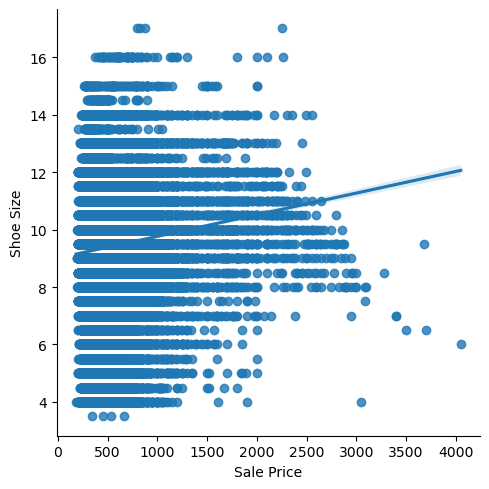

In [29]:
# Scatterplot to visualize the correlation between sale price and shoe size
sns.lmplot(data=sniker,x='Sale Price', y='Shoe Size')

Supporting the explanation above, based on the scatter diagram, there is a positive correlation. This implies that shoe size influences the resale price of shoes. It can be observed that as the shoe size increases, the selling price of the shoes also tends to increase. This phenomenon is influenced by the supply and demand dynamics of a shoe. Based on the calculated average shoe size, which is 9.5, it suggests that shoe sizes smaller or larger than this tend to be more expensive.

## Inferential Analysis

### Confidence Interval

I need the minimum and maximum prices for each brand to determine the price range at which shoes tend to sell more quickly. Then, based on the results, shoes within that range will be considered. Additionally, I also require the range of sizes that are most popular to focus on the types and sizes of shoes that are in high demand.

__Off-White Brand__

In [30]:
# Calculate the minimum and maximum prices from the overall 95% sales data of Nike x Off-White shoes
harga = sniker[['Sale Price']].loc[sniker['Brand'] == 'Off-White']
std = harga.std()
N = len(sniker)
low, up = stats.norm.interval(0.95,loc=harga.mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: [669.40665979]
Upper Limit: [673.55592206]


The insight gained from these values is that from the resale price data of Nike x Off-White shoes, 95% of the products are sold at an average low price of 669 and an average high price of 673. Therefore, it can be concluded that items tend to sell more around these prices. It is possible that higher-priced items may also sell, but such data falls into the outlier category.

In [31]:
# Types of shoes that meet the minimum and maximum prices
priceOW =  sniker[(sniker['Brand']== 'Off-White') & (sniker['Sale Price'] >= 669.40665979) & (sniker['Sale Price'] <= 673.55592206)]
list(priceOW['Sneaker Name'].unique())


['Nike-Blazer-Mid-Off-White',
 'Nike-Air-Max-90-Off-White',
 'Nike-Air-VaporMax-Off-White',
 'Nike-Air-Force-1-Low-Off-White',
 'Nike-Air-Max-97-Off-White',
 'Nike-Air-VaporMax-Off-White-Black',
 'Nike-Zoom-Fly-Off-White',
 'Nike-React-Hyperdunk-2017-Flyknit-Off-White',
 'Air-Jordan-1-Retro-High-Off-White-University-Blue',
 'Nike-Air-Presto-Off-White-Black-2018',
 'Nike-Air-Presto-Off-White-White-2018',
 'Nike-Blazer-Mid-Off-White-All-Hallows-Eve',
 'Nike-Blazer-Mid-Off-White-Grim-Reaper',
 'Nike-Air-Max-97-Off-White-Black',
 'Nike-Blazer-Mid-Off-White-Wolf-Grey',
 'Nike-Air-Max-97-Off-White-Menta',
 'Nike-Air-Force-1-Low-Off-White-Black-White',
 'Nike-Air-Max-90-Off-White-Desert-Ore']

Here are the types of shoes that fall within the minimum and maximum price ranges from the above calculations. Among them are the Nike Blazer Mid Off-White, Nike Air Max 90 Off-White, and Nike Air VaporMax Off-White.

__Yeezy Brand__

In [32]:
#Syntax to determine the minimum and maximum prices from the overall 95% sales data of Adidas Yeezy shoes.
harga = sniker[['Sale Price']].loc[sniker['Brand'] == 'Yeezy']*1.2
std = harga.std()
N = len(sniker)
low, up = stats.norm.interval(0.95,loc=harga.mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: [430.96981327]
Upper Limit: [433.10831095]


The insight obtained from the values is that from the resale price data of Adidas Yeezy shoes, 95% of the products are sold at an average low price of 430 and an average high price of 433. Therefore, it can be concluded that items tend to sell more around these prices.

In [33]:
#Syntax to determine the types of shoes that meet the minimum and maximum prices from the calculations.
priceYE =  sniker[(sniker['Brand']== 'Yeezy') & (sniker['Sale Price'] >= 430.96981327) & (sniker['Sale Price'] <= 433.10831095)]
list(priceYE['Sneaker Name'].unique())

['Adidas-Yeezy-Boost-350-V2-Cream-White',
 'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
 'Adidas-Yeezy-Boost-350-V2-Blue-Tint',
 'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
 'Adidas-Yeezy-Boost-350-V2-Zebra',
 'adidas-Yeezy-Boost-350-V2-Static',
 'adidas-Yeezy-Boost-350-V2-Static-Reflective']

Here are the types of shoes that fall within the minimum and maximum price ranges from the calculations. Among them are the Adidas Yeezy Boost 350 V2 Cream White, Adidas Yeezy Boost 350 V2 Beluga 2.0, and Adidas Yeezy Boost 350 V2 Blue Tint.

It is possible that higher-priced items may also sell, but such data falls into the outlier category, indicating that fewer people purchase shoes in larger sizes.

__size__

In [34]:
#Syntax to determine the minimum and maximum shoe sizes from the overall 95% sales data of shoes.

size = sniker[['Shoe Size']]
std = size.std()
N = len(sniker)
low, up = stats.norm.interval(0.95,loc=size.mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: [9.32973959]
Upper Limit: [9.35862329]


The insight obtained from the data is that the lower and upper limits are very close, around Size 9. Therefore, on average, 95% of the shoes sold are around size 9.

### Hypotesis Test

This hypothesis test aims to determine whether the average shoe size sold for Adidas x Yeezy and Nike x Off-White brands are equal or not. The expected insight is to gain clarity in purchasing decisions regarding whether there is a difference in the average sizing between each brand. Thus, it will help in understanding whether buying the same size for both brands can maximize profit based on the average shoe size sold per brand.

Hypothesis:  
h0: The average shoe size of Yeezy is == to Off-White.  
h1: The average shoe size of Yeezy is != to Off-White.

In [35]:

# Grouping shoe sizes for the Yeezy brand
size_ye = sniker['Shoe Size'].loc[sniker['Brand'] == 'Yeezy']


In [36]:
#Average shoe size for Yeezy sneakers
size_ye.mean()

9.238331808985338

In [37]:
#Grouping sneaker sizes for the Nike x Off-White brand

size_ow = sniker['Shoe Size'].loc[sniker['Brand'] == 'Off-White']


In [38]:
#Average size of Nike x Off-White sneakers
size_ow.mean()

9.619000503705836

In [39]:
#Hypothesis Testing Using the Two Independent Samples Method
t_stat, p_val = stats.ttest_ind(size_ye, size_ow)
print(f'P-value: {p_val}') 
print('t-statistics:',t_stat)

P-value: 7.613829548770925e-119
t-statistics: -23.209105589178314


Based on the hypothesis test, the p value obtained is below 0.05, so h1 is accepted. hypothesis h1 is that the average size of Yezzy shoes sold is not the same as the size of off-white shoes sold. It can be clarified that the average for Yeezy shoes is more in size 9 and for Nike x Offwhite shoes more in size 9.5. So there is a difference in purchases for stock shoes later.

# Conclusion

Based on the results of the analysis carried out, Adidas Yeezy shoes sell faster than Nike x Off-White shoes. To sell Adidas Yeezy, the most popular price range is 430 - 433 dollars with a size of around size 9. To sell off-white shoes, you can sell shoes in the range of 669 - 673 dollars with a size of around size 9.5. But there is an analysis that overall, on average, most transactions occur for shoe sizes US 8 to US 10. So I can buy stock of shoes in that range. But there is more stock for Size 9 on Adidas Yeezy shoes and Size 9.5 on Nike x Offwhite shoes. Based on this data, it can also be concluded that if you create a target market for consumers in certain cities with high economic levels, it will be able to influence sellers of goods. Apart from that, increasing promotions at the end of the year and January would be better because based on data, many transactions occur in November, December and January. So based on this data, it is recommended to increase the supply of goods due to the high purchasing power of consumers in November, December and January to get big profits from the number of sneakers sold.